<a href="https://colab.research.google.com/github/MonirulIslamm08/Dog-Breed-Detection-Project-Using-Transfer-Learning/blob/main/Dog_Breed_Detection_Project_Using_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mohamedchahed/dog-breeds/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: username":"monirul08
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mohamedchahed/dog-breeds


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
DATA_DIR = '/content/dog-breeds'
IMG_SIZE = 224
BATCH_SIZE = 32

In [ ]:
# Creating ImageDataGenerator instance to Augument,split and then pass our images to the model
data_gen = ImageDataGenerator(rescale = 1./255 ,
                              width_shift_range = 0.2 ,
                              validation_split=0.1,
                              height_shift_range = 0.2 ,
                              shear_range = 0.2 ,
                              horizontal_flip = True ,
                              vertical_flip = True,
                              zoom_range = 0.2)

In [ ]:
# Creating our test and validation data generator to flow images to network from images directory

training_data = data_gen.flow_from_directory('/content/dog-breeds/dog-breeds',
                                            target_size = (224,224),
                                            class_mode='categorical',
                                            subset = 'training'
                                            )
validation_data = data_gen.flow_from_directory('/content/dog-breeds/dog-breeds',
                                              target_size = (224,224),
                                              class_mode='categorical',
                                              subset = 'validation')

Found 490 images belonging to 8 classes.
Found 51 images belonging to 8 classes.


{'beagle': 0, 'bulldog': 1, 'dalmatian': 2, 'german-shepherd': 3, 'husky': 4, 'labrador-retriever': 5, 'poodle': 6, 'rottweiler': 7}
(32, 224, 224, 3) (32, 8)


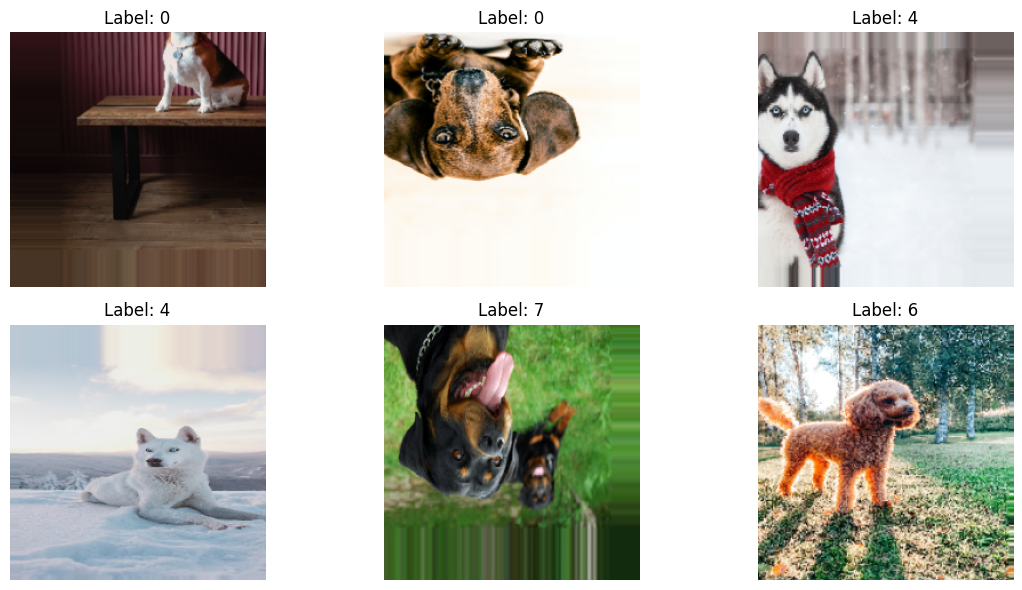

In [ ]:
# Optional: See class indices
print(training_data.class_indices)

# Visualize sample images
import matplotlib.pyplot as plt

images, labels = next(training_data)
print(images.shape, labels.shape)
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
    plt.title("Label: " + str(labels[i].argmax()))
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Load base model with pretrained ImageNet weights (excluding top layer)


In [ ]:
base_model = InceptionV3(weights = 'imagenet', include_top= False,
                         input_shape = (224,224, 3))

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Model Architecture

In [ ]:
# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(8, activation='softmax')(x)  # 8 classes in your case
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 22,329,384 (85.18 MB)

 Trainable params: 526,600 (2.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD


opt = SGD(learning_rate=0.01, momentum=0.9) # Now SGD is defined and can be used
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler # Importing the LearningRateScheduler
import numpy as np
# define the set of callbacks to be passed to the model during training
# defining our scheduler
def step_decay(epoch):
    # initialize the base initial learning rate, drop factor, and
    # epochs to drop every
    initial_alpha = 0.01
    factor = 0.5
    drop_every_epoch = 5
    # compute learning rate for the current epoch
    alpha = initial_alpha * (factor ** np.floor((1+epoch) / drop_every_epoch))
    # return the learning rate
    return float(alpha)

callbacks = [LearningRateScheduler(step_decay)]

# train this model

In [ ]:
# Train the model.
history = model.fit(
            training_data,
            validation_data = validation_data,
            epochs = 20,
            callbacks=callbacks,
            verbose = 1)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.3103 - loss: 2.0094 - val_accuracy: 0.7843 - val_loss: 0.5369 - learning_rate: 0.0100
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 788ms/step - accuracy: 0.8277 - loss: 0.5287 - val_accuracy: 0.8431 - val_loss: 0.5149 - learning_rate: 0.0100
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 760ms/step - accuracy: 0.8335 - loss: 0.5301 - val_accuracy: 0.9020 - val_loss: 0.3347 - learning_rate: 0.0100
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 754ms/step - accuracy: 0.8304 - loss: 0.5427 - val_accuracy: 0.9608 - val_loss: 0.2759 - learning_rate: 0.0100
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 710ms/step - accuracy: 0.8624 - loss: 0.4137 - val_accuracy: 0.8824 - val_loss: 0.3290 - learning_rate: 0.0050
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 755ms/step - accuracy: 0.8981 - loss: 0.3032 - val_accuracy: 0.9216 - val_loss: 0.2809 - learning_rate: 0.0050
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 763ms/step - accuracy: 0.8970 - loss: 0.322

# plot the training loss and accuracy

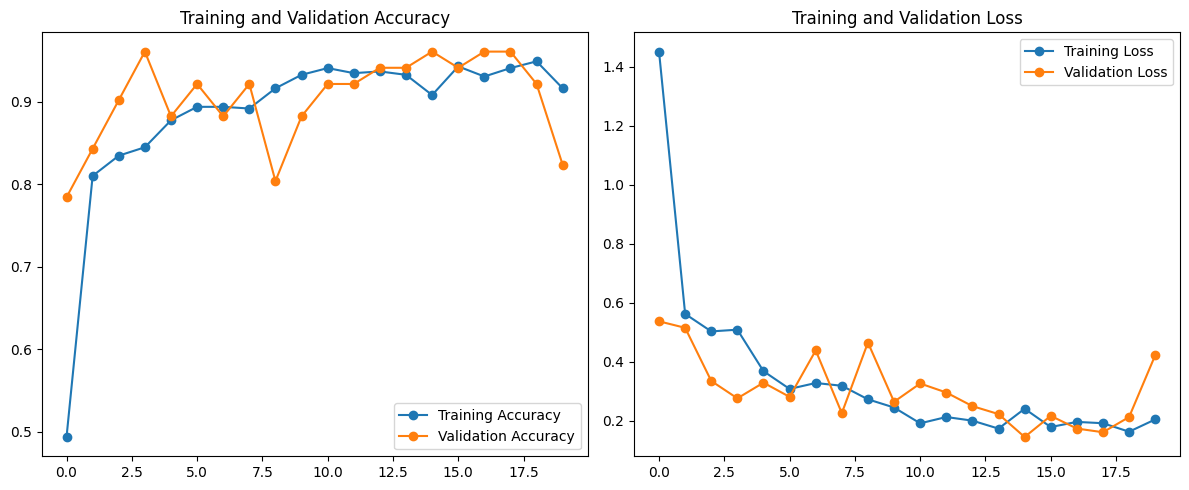

In [ ]:
import matplotlib.pyplot as plt

# Extract metrics from training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

# Plot
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()


## Make Prediction

In [ ]:
import numpy as np

# predict on the validation data

y_pred = model.predict(validation_data)

# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 6s/step


In [ ]:
# Get True Labels

y_true = validation_data.classes
class_labels = list(validation_data.class_indices.keys())

# plot confusion Matrix

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
 cm = confusion_matrix(y_true, y_pred_classes)

Text(0.5, 1.0, 'Confusion Matrix')

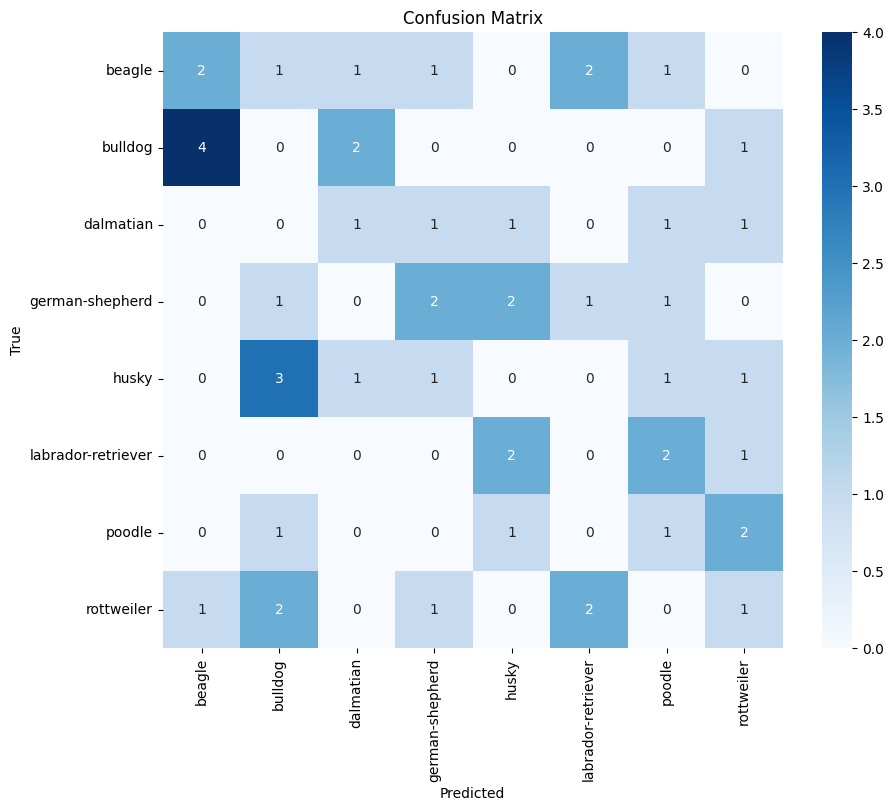

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred_classes, target_names=class_labels)
print(report)


                    precision    recall  f1-score   support

            beagle       0.29      0.25      0.27         8
           bulldog       0.00      0.00      0.00         7
         dalmatian       0.20      0.20      0.20         5
   german-shepherd       0.33      0.29      0.31         7
             husky       0.00      0.00      0.00         7
labrador-retriever       0.00      0.00      0.00         5
            poodle       0.14      0.20      0.17         5
        rottweiler       0.14      0.14      0.14         7

          accuracy                           0.14        51
         macro avg       0.14      0.13      0.14        51
      weighted avg       0.14      0.14      0.14        51



# Save the Model

In [ ]:
model.save('dog_breed_detector.keras')

In [ ]:
import keras
keras.saving.save_model(model, 'dog_breed_detector.keras')


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('dog_breed_detector.keras')


# pridictive  system

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import pickle
import cv2

In [ ]:
# Load model
model = load_model('dog_breed_detector.keras')  # or .h5

# Assuming your labels are in order
class_labels = list(validation_data.class_indices.keys())

# Save the class labels (if not already done)
with open('class_labels.pkl', 'wb') as f:  # Use 'wb' to write binary
    pickle.dump(class_labels, f)

# Load class labels (for prediction later)
with open('class_labels.pkl', 'rb') as f:  # Use 'rb' to read binary
    class_labels = pickle.load(f)

In [ ]:
def predict_and_show(img_path, model, class_labels):
    # Load image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_exp = np.expand_dims(img_array, axis=0) / 255.0

    # Predict
    predictions = model.predict(img_array_exp)
    predicted_index = np.argmax(predictions)
    predicted_breed = class_labels[predicted_index]
    confidence = np.max(predictions)

    # Display the image with prediction
    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6, 6))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"{predicted_breed} ({confidence*100:.2f}%)", fontsize=14, color='green')
    plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


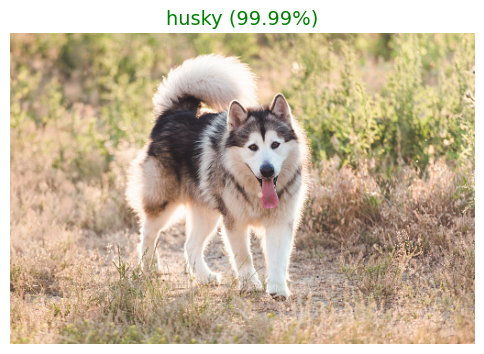

In [ ]:
# Example use
predict_and_show('/content/dog-breeds/dog-breeds/husky/husky16.jpg', model, class_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


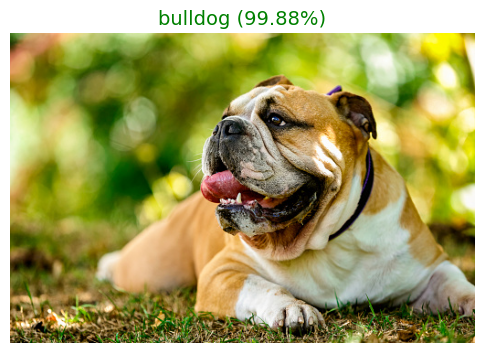

In [ ]:
# Example use
predict_and_show('/content/dog-breeds/dog-breeds/bulldog/bulldog19.jpg', model, class_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


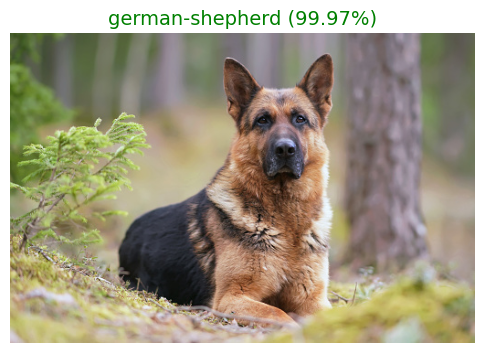

In [ ]:
# Example use
predict_and_show('/content/dog-breeds/dog-breeds/german-shepherd/german-shepherd8.jpg', model, class_labels)